# Heroes of Pymoli

### The data set analyzed here is in-game purchase data for a fictional online fantasy game called Heroes of Pymoli. The game has 1163 total active players, of which 576 (49.5%) are buyers who have made a total of 780 purchases. The data set describes each purchase, identified by a unique purchase ID, and details the user who made the purchase and the item bought. 

In [3]:
# Import dependencies and setup
import pandas as pd
import numpy as np

data_path = "purchase_data.csv"
data = pd.read_csv(data_path)

In [247]:
data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Range
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,30 & Over
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24
...,...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54,20-24
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63,20-24
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46,20-24
778,778,Sisur91,7,Male,101,Final Critic,4.19,15 & Under


In [323]:
# Calculate total number of buyers and purchases
total_purchases = len(data)
purchasing_players = data['SN'].nunique()
purchasers_pct = purchasing_players / 1163
freetoplay_players = 1163 - purchasing_players
freetoplay_pct = freetoplay_players / 1163
print(f'Total Free-To-Play Players: {freetoplay_players} ({freetoplay_pct:.1%})')
print(f'Total Purchasing Players: {purchasing_players} ({purchasers_pct:.1%})')
print(f'Total Purchases: {total_purchases}')

Total Free-To-Play Players: 587 (50.5%)
Total Purchasing Players: 576 (49.5%)
Total Purchases: 780


In [212]:
data.describe()

,Purchase ID,Age,Item ID,Price
count,780.000000,780.000000,780.000000,780.000000
mean,389.500000,22.714103,92.114103,3.050987
std,225.310896,6.659444,52.775943,1.169549
min,0.000000,7.000000,0.000000,1.000000
25%,194.750000,20.000000,48.000000,1.980000
50%,389.500000,22.000000,93.000000,3.150000
75%,584.250000,25.000000,139.000000,4.080000
max,779.000000,45.000000,183.000000,4.990000


Purchases by Gender
----------------------------
Of players that made a purchase, 84.0% (484) were male and 14.1% (81) were female. Male buyers made 83.6% (652) of the total purchases and female buyers made 14.5% (113) of the total purchases.

Revenue from men totaled $1967.64 with an average purchase price of $3.02 and average spend of $4.07 per person. Revenue from women totaled $361.94 with an average purchase price of $3.20 and average spend of $4.47 per person.

In [251]:
purchases_by_gender = data.groupby('Gender')
gender_summary = pd.DataFrame(purchases_by_gender['SN'].nunique()).rename(columns={'SN': 'Buyers'})
gender_summary['% of Buyers'] = gender_summary['Buyers'] / purchasing_players
gender_summary['Purchases'] = purchases_by_gender['Purchase ID'].count()
gender_summary['% of Purchases'] = gender_summary['Purchases'] / gender_summary['Purchases'].sum()
gender_summary['Avg Purchase'] = purchases_by_gender['Price'].mean()
gender_summary['Total Revenue'] = purchases_by_gender['Price'].sum()
gender_summary['Avg Revenue per Person'] = gender_summary['Total Revenue'] / gender_summary['Buyers']
gender_summary.style.format({'% of Buyers': '{:.2%}', '% of Purchases': '{:.2%}', 'Avg Purchase': '${:.2f}', 'Total Revenue': '${:.2f}', 'Avg Revenue per Person': '${:.2f}'})

,Buyers,% of Buyers,Purchases,% of Purchases,Avg Purchase,Total Revenue,Avg Revenue per Person
Gender,,,,,,,
Female,81,14.06%,113,14.49%,$3.20,$361.94,$4.47
Male,484,84.03%,652,83.59%,$3.02,$1967.64,$4.07
Other / Non-Disclosed,11,1.91%,15,1.92%,$3.35,$50.19,$4.56


Purchases by Age
---------------------
The majority of players who make a purchase (44.8%) are 20-24, followed by those who are 15-19 (18.6%) and those who are over 30 (16.5%). The least likely to buy are 25-29 (13.4%) and under 15 (6.8%).

In [325]:
age_labels = ['14 & Under', '15-19', '20-24', '25-29', '30 & Over']
age_bins = [0, 14, 19, 24, 29, 99999]
data['Age Range'] = pd.cut(data['Age'], bins = age_bins, labels = age_labels)
purchases_by_age = data.groupby('Age Range')
age_summary = pd.DataFrame(purchases_by_age['SN'].nunique()).rename(columns={'SN': 'Buyers'})
age_summary['% of Buyers'] = age_summary['Buyers'] / purchasing_players
age_summary['Purchases'] = purchases_by_age['Purchase ID'].count()
age_summary['% of Purchases'] = age_summary['Purchases'] / age_summary['Purchases'].sum()
age_summary['Avg Purchase'] = purchases_by_age['Price'].mean()
age_summary['Total Revenue'] = purchases_by_age['Price'].sum()
age_summary['Avg Revenue per Person'] = age_summary['Total Revenue'] / age_summary['Buyers']
age_summary.style.format({'% of Buyers': '{:.2%}', '% of Purchases': '{:.2%}', 'Avg Purchase': '${:.2f}', 'Total Revenue': '${:.2f}', 'Avg Revenue per Person': '${:.2f}'})                                                                        

,Buyers,% of Buyers,Purchases,% of Purchases,Avg Purchase,Total Revenue,Avg Revenue per Person
Age Range,,,,,,,
14 & Under,39,6.77%,51,6.54%,$3.14,$159.91,$4.10
15-19,107,18.58%,136,17.44%,$3.04,$412.89,$3.86
20-24,258,44.79%,365,46.79%,$3.05,$1114.06,$4.32
25-29,77,13.37%,101,12.95%,$2.90,$293.00,$3.81
30 & Over,95,16.49%,127,16.28%,$3.15,$399.91,$4.21


Pricing Analysis
-------------------------
179 different items were purchased for a total of $2379.77 in revenue. There are 145 different prices with an average item price of $3.04. Each item was purchased an average of 4 times. Top performing items (8-12 purchases) cost an average of $3.60 per item whereas average sellers (4-7 purchases) were $2.95 and poor sellers (1-3 purchases) were $3.08.

In [350]:
items_grouped_df = data[['Item ID', 'Item Name', 'Price']].groupby(['Item ID', 'Item Name'])
items_index = items_grouped_df.indices
items = pd.DataFrame.from_dict(dict([*items_index.keys()]), orient='index', columns=['Item Name']).set_index('Item Name', append=True)
items['Price'] = items_grouped_df.mean()
items['Purchases'] = items_grouped_df.count()
items['Revenue'] = items_grouped_df.sum()
items.sort_values('Purchases', ascending=False).head().style.format({'Price': '${:,.2f}', 'Revenue': '${:,.2f}'})

,,Price,Purchases,Revenue
,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",$4.23,12,$50.76
145,Fiery Glass Crusader,$4.58,9,$41.22
108,"Extraction, Quickblade Of Trembling Hands",$3.53,9,$31.77
82,Nirvana,$4.90,9,$44.10
19,"Pursuit, Cudgel of Necromancy",$1.02,8,$8.16


In [338]:
total_items = len(items)
print(f'Total items: {total_items:,.0f}')
average_price = items['Price'].mean()
print(f'Average Item Price: ${average_price:,.2f}')
median_price = items['Price'].median()
print(f'Median Price: ${median_price:,.2f}')
total_revenue = data['Price'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')
avg_purchases = items['Purchases'].mean()
print(f'Avg Times Purchased: {avg_purchases:,.0f}')

Total items: 183
Average Item Price: $3.04
Median Price: $3.14
Total Revenue: $2,379.77
Avg Times Purchased: 4


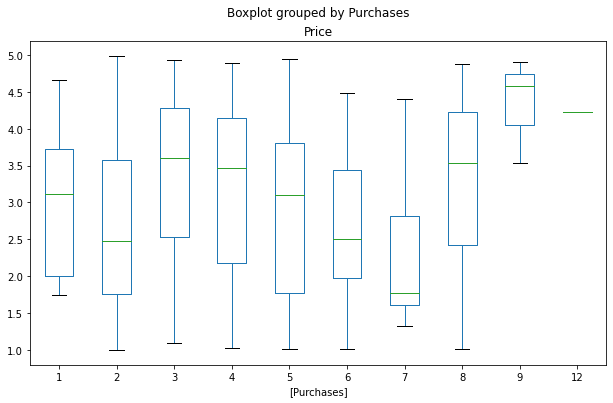

In [333]:
items.boxplot(by='Purchases', grid=False, figsize=(10, 6))

In [362]:
items.groupby('Purchases').mean().style.format({'Price': '${:,.2f}', 'Revenue': '${:,.2f}'})

,Price,Revenue
Purchases,,
1,$3.03,$3.03
2,$2.68,$5.36
3,$3.41,$10.21
4,$3.22,$12.86
5,$2.95,$14.76
6,$2.74,$16.45
7,$2.23,$15.59
8,$3.29,$26.30
9,$4.34,$39.03


In [354]:
popularity_labels = ['Poor', 'Average', 'Top']
popularity_bins = [0, 3, 7, 13]
items['Popularity'] = pd.cut(items['Purchases'], bins=sales_bins, labels=sales_labels)
items.groupby('Popularity').mean().style.format({'Price': '${:,.2f}', 'Purchases': '{:.2f}', 'Revenue': '${:.2f}'})

,Price,Purchases,Revenue
Popularity,,,
Poor,$3.08,2.28,$7.17
Average,$2.95,4.96,$14.37
Top,$3.60,8.54,$31.12


Item Analysis
----------------


In [360]:
sales_labels = ['Poor', 'Average', 'Top']
sales_bins = [0, 6.99, 16.99, 99]
items['Sales'] = pd.cut(items['Revenue'], bins=sales_bins, labels=sales_labels)
items.head()

,,Price,Purchases,Revenue,Popularity,Sales
,Item Name,,,,,
0,Splinter,1.28,4,5.12,Average,Poor
1,Crucifer,3.26,3,9.78,Poor,Average
2,Verdict,2.48,6,14.88,Average,Average
3,Phantomlight,2.49,6,14.94,Average,Average
4,Bloodlord's Fetish,1.70,5,8.50,Average,Average


User Analysis
------------
